In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import os
os.getcwd()

'c:\\Users\\HP\\Desktop\\SAJAL GOEL\\PEST PROJECT ([PAPER1 )]'

In [3]:
df = pd.read_csv("df.csv")

# Convert date column
df["CreatedOn"] = pd.to_datetime(df["CreatedOn"])

df.head()


,Unnamed: 0,Dist Name,Pest,CreatedOn,pest_count,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,24 parganas (NORTH DISTRICT),aphid,2013-05-08,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,24 parganas (NORTH DISTRICT),aphid,2013-11-06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,24 parganas (NORTH DISTRICT),aphid,2013-11-11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24 parganas (NORTH DISTRICT),aphid,2013-11-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,24 parganas (NORTH DISTRICT),aphid,2013-12-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["CreatedOn"] = pd.to_datetime(df["CreatedOn"])
df.head()

,Unnamed: 0,Dist Name,Pest,CreatedOn,pest_count,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,24 parganas (NORTH DISTRICT),aphid,2013-05-08,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,24 parganas (NORTH DISTRICT),aphid,2013-11-06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,24 parganas (NORTH DISTRICT),aphid,2013-11-11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24 parganas (NORTH DISTRICT),aphid,2013-11-25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,24 parganas (NORTH DISTRICT),aphid,2013-12-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check unique values to ensure correct spelling
print("Sample Districts:", df["Dist Name"].unique()[:10])
print("Sample Pests:", df["Pest"].unique()[:10])

# Update the district name based on the printed samples
district = "24 parganas (NORTH DISTRICT)"
pest = "aphid"

filtered_df = df[
    (df["Dist Name"] == district) &
    (df["Pest"] == pest)
]

print(f"\nFiltered Data Shape: {filtered_df.shape}")
if filtered_df.empty:
    print("WARNING: Filtered data is empty! Check the spelling of district and pest.")

Sample Districts: ['24 parganas (NORTH DISTRICT)' '24 parganas (SOUTH DISTRICT)' 'ADILABAD'
 'AGRA' 'AHMADABAD' 'AHMADNAGAR' 'AJMER' 'AKOLA' 'ALAPPUZHA' 'ALIGARH']
Sample Pests: ['aphid' 'armyworm' 'ashweevil' 'backmoth' 'beetle' 'borer'
 'brownplanthopper' 'bug' 'caterpiller' 'cutworm']

Filtered Data Shape: (135, 12)


In [9]:
ts = (
    filtered_df
    .set_index("CreatedOn")
    .resample("M")["pest_count"]
    .sum()
)

ts.head()


CreatedOn
2013-05-31    1
2013-06-30    0
2013-07-31    0
2013-08-31    0
2013-09-30    0
Freq: ME, Name: pest_count, dtype: int64

In [11]:
ts.tail()

CreatedOn
2017-05-31    1
2017-06-30    1
2017-07-31    1
2017-08-31    2
2017-09-30    1
Freq: ME, Name: pest_count, dtype: int64

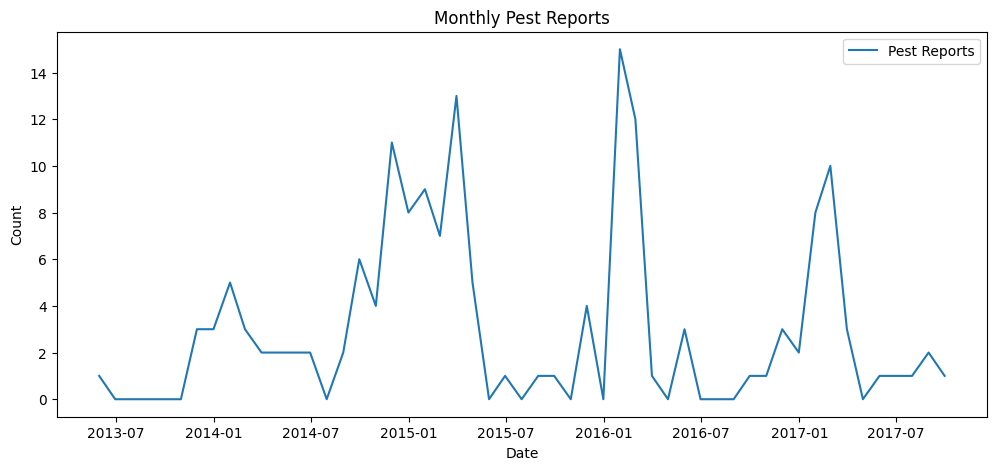

In [9]:
plt.figure(figsize=(12,5))
plt.plot(ts, label="Pest Reports")
plt.title("Monthly Pest Reports")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ADF Test function (safe)
def adf_test(series):
    series = series.dropna()
    
    if len(series) == 0:
        print("Series is empty after dropping NaNs. Cannot perform ADF test.")
        return
    
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# Run ADF test on the existing monthly 'ts' from Cell 6
adf_test(ts)

ADF Statistic: -4.123531667162864
p-value: 0.0008853259443893145
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562


In [11]:
ts_log = np.log(ts + 1)


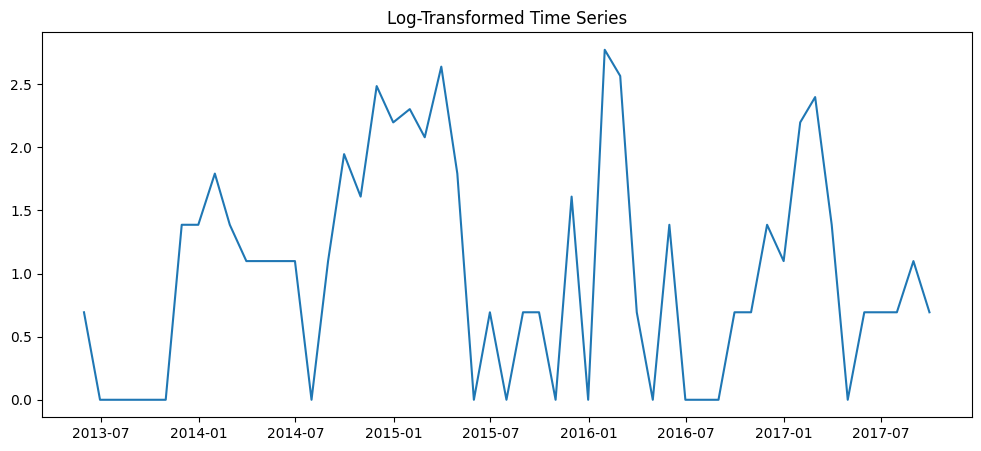

In [12]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.title("Log-Transformed Time Series")
plt.show()


In [13]:
ts_log_diff = ts_log.diff().dropna()


In [14]:
adf_test(ts_log_diff)


ADF Statistic: -5.215222889774276
p-value: 8.184239443985649e-06
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338


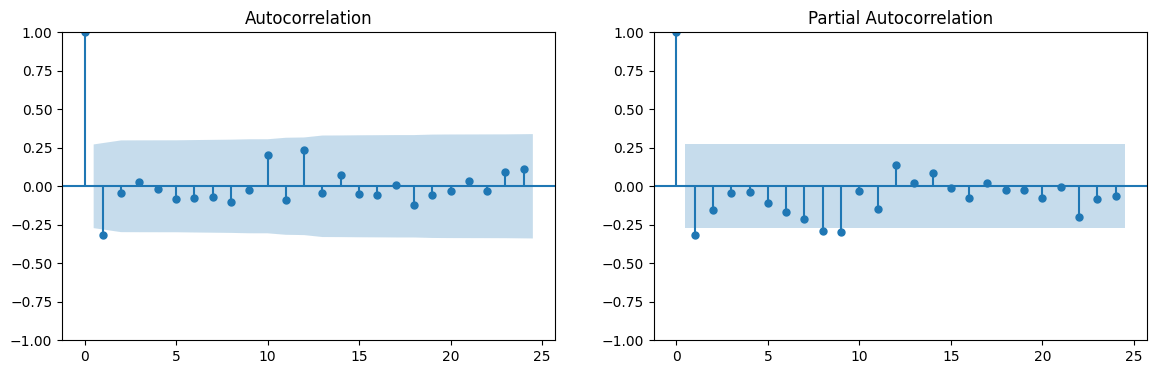

In [15]:
if len(ts_log_diff) > 2:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))

    # Adjust lags if data is small
    lags = min(24, len(ts_log_diff) // 2 - 1)
    
    plot_acf(ts_log_diff, ax=axes[0], lags=lags)
    plot_pacf(ts_log_diff, ax=axes[1], lags=lags)

    plt.show()
else:
    print("Cannot plot ACF/PACF because data is insufficient or empty.")

In [ ]:
import itertools

# Define the p, d, q ranges (0 to 1 to keep it fast, increase to 2 for better results)
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_params = None
best_seasonal_params = None
results = None

print("Starting Grid Search for Best SARIMA Parameters...")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(
                ts_log,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            
            temp_results = model.fit(disp=False)
            
            # Print every model checked (optional)
            # print(f"ARIMA{param}x{param_seasonal}12 - AIC:{temp_results.aic}")

            if temp_results.aic < best_aic:
                best_aic = temp_results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                results = temp_results  # Save best model
                print(f"New Best AIC: {best_aic:.2f} | {param}x{param_seasonal}")
                
        except Exception as e:
            continue

print("\n" + "="*50)
print(f"Best Model Found: SARIMA{best_params}x{best_seasonal_params}12")
print(f"Best AIC: {best_aic}")
print("="*50)

# Display Summary of the Best Model
print(results.summary())

Starting Grid Search for Best SARIMA Parameters...
New Best AIC: 179.58 | (0, 0, 0)x(0, 0, 0, 12)
New Best AIC: 133.83 | (0, 0, 0)x(0, 0, 1, 12)
New Best AIC: 116.60 | (0, 0, 0)x(0, 1, 0, 12)
New Best AIC: 116.56 | (0, 0, 0)x(1, 0, 0, 12)
New Best AIC: 100.48 | (0, 0, 0)x(1, 0, 1, 12)
New Best AIC: 66.50 | (0, 0, 0)x(1, 1, 0, 12)
New Best AIC: 65.79 | (0, 0, 0)x(1, 1, 1, 12)
New Best AIC: 64.76 | (0, 1, 1)x(1, 1, 1, 12)

Best Model Found: SARIMA(0, 1, 1)x(1, 1, 1, 12)12
Best AIC: 64.76440953384514
                                     SARIMAX Results                                      
Dep. Variable:                         pest_count   No. Observations:                   53
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -28.382
Date:                            Mon, 19 Jan 2026   AIC                             64.764
Time:                                    23:29:39   BIC                             69.797
Sample:                                05-

In [36]:
results.aic


np.float64(64.76440953384514)

In [37]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


In [39]:
print("Forecasted Values:\n", forecast_mean)
print("\nConfidence Intervals:\n", forecast_ci)
print("Forecasted :\n", forecast)


Forecasted Values:
 2017-10-31    0.058196
2017-11-30    1.293208
2017-12-31    0.228650
2018-01-31    2.295093
2018-02-28    2.248682
2018-03-31    0.756911
2018-04-30   -0.212678
2018-05-31    0.847811
2018-06-30    0.043965
2018-07-31    0.032385
2018-08-31    0.204401
2018-09-30    0.451804
Freq: ME, Name: predicted_mean, dtype: float64

Confidence Intervals:
             lower pest_count  upper pest_count
2017-10-31         -1.316961          1.433352
2017-11-30         -0.081948          2.668365
2017-12-31         -1.146507          1.603806
2018-01-31          0.919937          3.670250
2018-02-28          0.873526          3.623839
2018-03-31         -0.618245          2.132068
2018-04-30         -1.587834          1.162479
2018-05-31         -0.527347          2.222969
2018-06-30         -1.331193          1.419122
2018-07-31         -1.342773          1.407542
2018-08-31         -1.170757          1.579558
2018-09-30         -0.923354          1.826962
Forecasted :


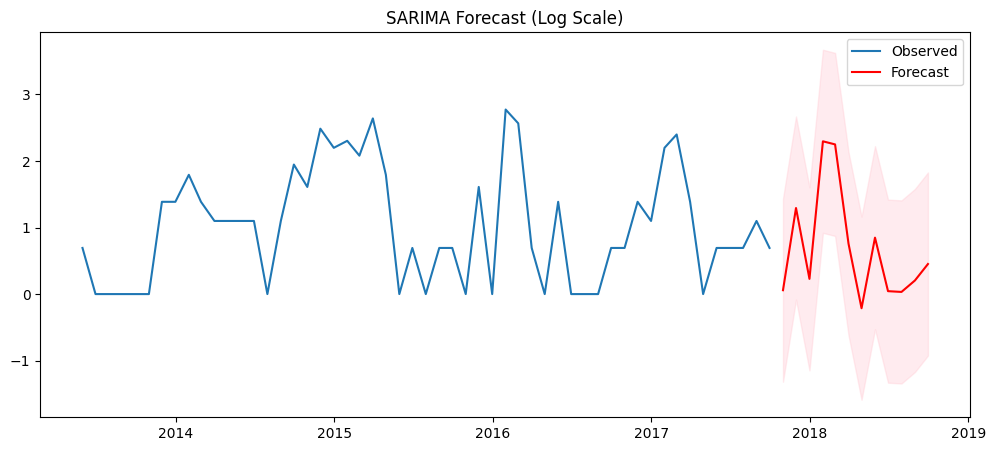

In [40]:
plt.figure(figsize=(12,5))
plt.plot(ts_log, label="Observed")
plt.plot(forecast_mean, label="Forecast", color="red")

plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color="pink",
    alpha=0.3
)

plt.legend()
plt.title("SARIMA Forecast (Log Scale)")
plt.show()


In [41]:
forecast_actual = np.exp(forecast_mean) - 1


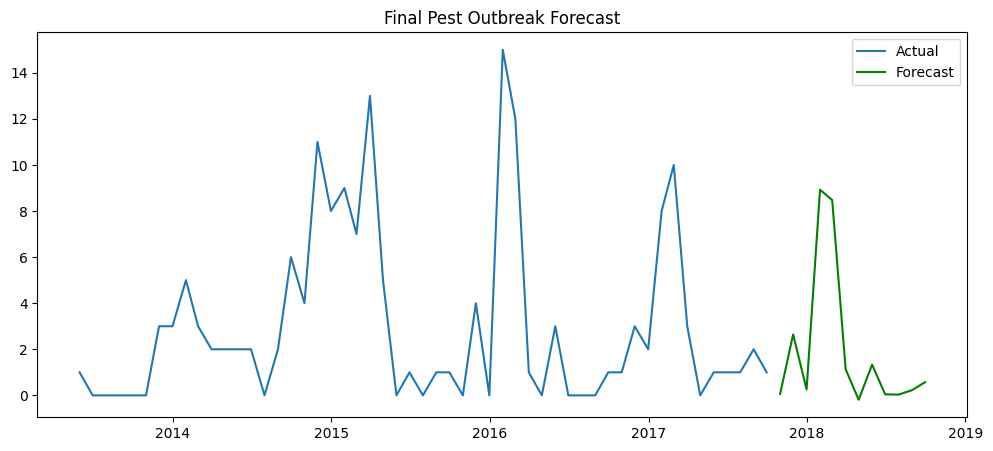

In [42]:
plt.figure(figsize=(12,5))
plt.plot(ts, label="Actual")
plt.plot(forecast_actual, label="Forecast", color="green")
plt.legend()
plt.title("Final Pest Outbreak Forecast")
plt.show()


In [ ]:
# new code

In [13]:
train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]
test = ts.iloc[train_size:]

In [15]:
train_log = np.log(train + 1)
test_log = np.log(test + 1)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_order = (0, 1, 1)
best_seasonal_order = (1, 1, 1, 12)

model = SARIMAX(train_log,
                order=best_order,
                seasonal_order=best_seasonal_order)

results = model.fit()

In [19]:
forecast_object = results.get_forecast(steps=len(test))

forecast_mean_log = forecast_object.predicted_mean
forecast_ci_log = forecast_object.conf_int()

In [21]:
forecast_mean = np.exp(forecast_mean_log) - 1

forecast_ci_lower = np.exp(forecast_ci_log.iloc[:, 0]) - 1
forecast_ci_upper = np.exp(forecast_ci_log.iloc[:, 1]) - 1

In [23]:
forecast_df = pd.DataFrame({
    "Actual": test.values,
    "Forecast_Mean": forecast_mean.values,
    "CI_Lower": forecast_ci_lower.values,
    "CI_Upper": forecast_ci_upper.values
}, index=test.index)

print(forecast_df)

            Actual  Forecast_Mean  CI_Lower   CI_Upper
CreatedOn                                             
2016-11-30       3       4.525071  0.480983  19.612263
2016-12-31       2       3.672595  0.187519  17.385516
2017-01-31       8       4.868513  0.416925  23.305769
2017-02-28      10       3.353168  0.000314  17.944132
2017-03-31       3       4.371501  0.176625  23.521844
2017-04-30       0       2.269951 -0.316197  14.636926
2017-05-31       1       0.237700 -0.748898   5.100699
2017-06-30       1       0.594848 -0.689278   7.185890
2017-07-31       1      -0.241192 -0.857889   3.051692
2017-08-31       2       0.594848 -0.712622   7.850863
2017-09-30       1       1.082177 -0.638708  10.999874


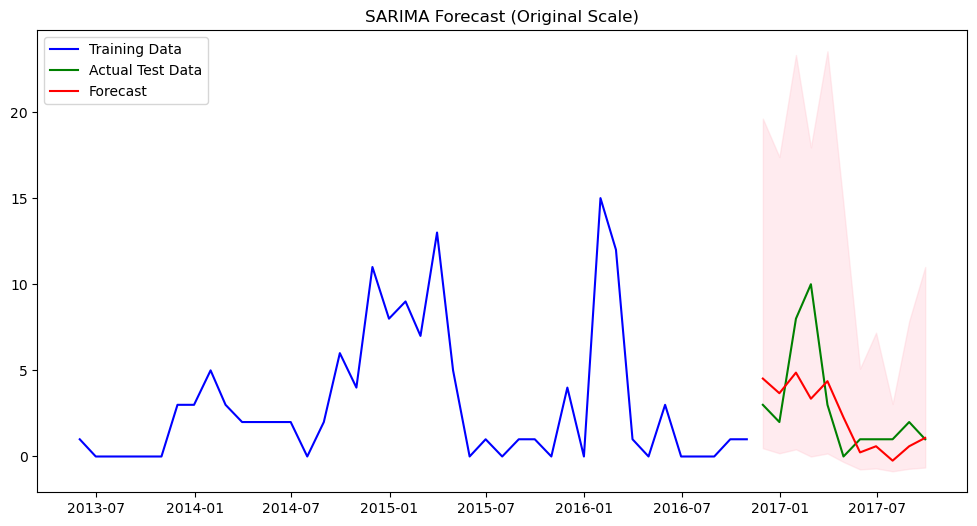

In [25]:
plt.figure(figsize=(12,6))

# Training
plt.plot(train.index, train, label="Training Data", color="blue")

# Test actual
plt.plot(test.index, test, label="Actual Test Data", color="green")

# Forecast
plt.plot(test.index, forecast_mean, 
         label="Forecast", color="red")

# Confidence Interval
plt.fill_between(test.index,
                 forecast_ci_lower,
                 forecast_ci_upper,
                 color='pink', alpha=0.3)

plt.title("SARIMA Forecast (Original Scale)")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
mape = np.mean(np.abs((test - forecast_mean) / test)) * 100
r2 = r2_score(test, forecast_mean)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1.8648554554353014
RMSE: 2.5300144971916882
R2: 0.3022362377693574
